## üìå GRU Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìïú ÏΩîÎ∞úÌä∏ Í∞ÄÍ≤© ÏòàÏ∏°

### ÏÇ¨Ïö©Î≥ÄÏàò : Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò, Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò, ÏãúÏû•Ï†ÑÎßùÏßÄÌëú

In [1]:
#!pip install torchvision

In [2]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torchvision.datasets
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
plt.style.use('seaborn-whitegrid')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)

if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)

C:\Users\wandong\AppData\Local\Temp\ipykernel_11156\1616429856.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('../../../../data/final/ÏΩîÎ∞úÌä∏data.csv')
Ï£ºÏãù=pd.read_csv('../../../../data/final/Ï£ºÏãù.csv',encoding='cp949')
df=pd.merge(df,Ï£ºÏãù,left_on='Í∏∞Ï§ÄÏùº',right_on='Date',how='left')
df

Í∏∞Ï§ÄÏùº     Í∏∞Ï§ÄÍ∞ÄÍ≤©   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close  \
0    2021-06-09  42500.0  2407.51  2494.11  1682.47  2193.115993  1116.890015   
1    2021-06-10  42500.0  2436.46  2523.49  1682.47  2227.469874  1116.410034   
2    2021-06-11  42500.0  2452.92  2519.40  1682.47  2284.482995  1111.260010   
3    2021-06-14  42500.0  2498.37  2567.59  1741.94  2315.536776  1115.550049   
4    2021-06-15  42500.0  2496.55  2564.67  1741.94  2315.536776  1116.319946   
..          ...      ...      ...      ...      ...          ...          ...   
726  2024-04-24  27720.0  2886.01  2500.92  1819.96  3043.299367  1370.479980   
727  2024-04-25  27730.0  2895.92  2521.51  1819.96  3021.949758  1376.969971   
728  2024-04-26  27730.0  2917.29  2545.06  1819.96  3037.851922  1371.699951   
729  2024-04-29  27720.0  2909.74  2543.69  1825.67  3008.618815  1377.089966   
730  2024-04-30  27720.0  2916.82  2538.73  1825.67  3050.612132  1374.640015   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ...     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
0     36.33    35.27   20.0  ...  0.550586  0.818009  0.000000  0.002092   
1     36.33    35.27   20.0  ...  0.559105  0.827488  0.004433  0.002511   
2     36.33    35.27   20.0  ...  0.618743  0.909005  0.007149  0.000152   
3     36.33    35.27   20.0  ...  0.620873  0.865403  0.007209  0.000455   
4     36.33    35.27   20.0  ...  0.650692  0.852133  0.008213  0.000268   
..      ...      ...    ...  ...       ...       ...       ...       ...   
726   71.94    69.18    1.1  ...  0.158679  0.020853  0.482357  0.380355   
727   71.94    69.18    1.1  ...  0.140575  0.004739  0.454861  0.399120   
728   71.94    69.18    1.1  ...  0.129925  0.005687  0.459643  0.390736   
729   71.94    69.18    1.1  ...  0.156550  0.047393  0.466816  0.390736   
730   71.94    69.18    1.1  ...  0.184239  0.060664  0.465620  0.391534   

      skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0    0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  
1    0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  
2    0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  
3    0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  
4    0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  
..        ...       ...       ...         ...       ...       ...  
726  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  
727  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  
728  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  
729  0.047605  0.311494  0.619411    0.135248  0.578555  0.305979  
730  0.039046  0.306688  0.615559    0.129226  0.584512  0.308565  

[731 rows x 25 columns]

In [5]:
df['ÏàòÍ∏âÏÉÅÌÉú'] = pd.cut(df['ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'],
                   bins=[-float('inf'), 1, 5, 20, 80, float('inf')],
                   labels=['ÏàòÍ∏âÏúÑÍ∏∞', 'ÏàòÍ∏âÎ∂àÏïà', 'ÏàòÍ∏âÏ£ºÏùò', 'ÏàòÍ∏âÏïàÏ†ï', 'Í≥µÍ∏âÍ≥ºÏûâ'])
df[['ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò','ÏàòÍ∏âÏÉÅÌÉú']]

ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÍ∏âÏÉÅÌÉú
0      35.27  ÏàòÍ∏âÏïàÏ†ï
1      35.27  ÏàòÍ∏âÏïàÏ†ï
2      35.27  ÏàòÍ∏âÏïàÏ†ï
3      35.27  ÏàòÍ∏âÏïàÏ†ï
4      35.27  ÏàòÍ∏âÏïàÏ†ï
..       ...   ...
726    69.18  ÏàòÍ∏âÏïàÏ†ï
727    69.18  ÏàòÍ∏âÏïàÏ†ï
728    69.18  ÏàòÍ∏âÏïàÏ†ï
729    69.18  ÏàòÍ∏âÏïàÏ†ï
730    69.18  ÏàòÍ∏âÏïàÏ†ï

[731 rows x 2 columns]

In [6]:
### 41Í∞úÏùò Í≥µÌú¥ÏùºÍ∞íÎì§Ïù¥ Ï°¥Ïû¨Ìï¥ÏÑú Ïù¥Ï†Ñ Í∞íÏúºÎ°ú Ï±ÑÏõåÏ§å

In [7]:
df.isna().sum()

Í∏∞Ï§ÄÏùº            0
Í∏∞Ï§ÄÍ∞ÄÍ≤©           0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò         0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò        0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò         0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        0
Close          0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú         0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò        0
ÏàòÏ∂ú Ï§ëÎüâ          0
ÏàòÏ∂ú Í∏àÏï°          0
ÏàòÏûÖ Ï§ëÎüâ          0
ÏàòÏûÖ Í∏àÏï°          0
Î¨¥Ïó≠ÏàòÏßÄ           0
Date          37
ÏÇºÏÑ±SDI         37
LGÌôîÌïô          37
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        37
ÏóêÏΩîÌîÑÎ°ú          37
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       37
ÏóòÏï§ÏóêÌîÑ          37
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        37
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    37
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       37
ÌèâÍ∑†Ï£ºÍ∞Ä          37
ÏàòÍ∏âÏÉÅÌÉú           0
dtype: int64

In [8]:
df[df['ÏÇºÏÑ±SDI'].isna()]

Í∏∞Ï§ÄÏùº     Í∏∞Ï§ÄÍ∞ÄÍ≤©   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close  \
48   2021-08-16  52330.0  2611.00  2452.16  2041.30  2854.110341  1161.380005   
72   2021-09-20  52990.0  2638.48  2280.24  2411.36  3337.811379  1181.109985   
73   2021-09-21  52990.0  2572.47  2184.62  2411.36  3362.248059  1186.319946   
74   2021-09-22  52985.0  2568.79  2184.37  2411.36  3345.817516  1182.920044   
82   2021-10-04  52965.0  2801.90  2297.90  2658.27  3948.531138  1180.000000   
87   2021-10-11  52950.0  2860.25  2371.28  2668.33  3922.334533  1195.579956   
144  2021-12-31  70195.0  2732.84  2436.65  3050.71  2912.464687  1189.890015   
164  2022-01-31  70715.0  3155.46  2647.56  3544.16  3834.072139  1207.709961   
165  2022-02-01  70705.0  3136.18  2633.95  3544.16  3795.501631  1205.119995   
166  2022-02-02  70710.0  3127.02  2637.42  3544.16  3743.976388  1202.500000   
185  2022-03-01  73705.0  3431.76  2746.58  3844.38  4561.335379  1200.930054   
191  2022-03-09  82250.0  4095.18  3033.31  3979.61  6552.009017  1233.109985   
229  2022-05-05  81715.0  3732.41  2686.11  4514.43  5855.422888  1251.500000   
248  2022-06-01  73625.0  3763.59  2619.18  4361.38  6426.559059  1241.739990   
249  2022-06-06  73605.0  3725.59  2588.67  4375.44  6360.965795  1250.530029   
299  2022-08-15  46500.0  3339.46  2257.74  4003.34  5986.195214  1301.380005   
317  2022-09-09  51520.0  3208.60  2112.36  4042.38  6083.473854  1383.000000   
318  2022-09-12  51515.0  3244.45  2148.17  4081.04  6055.869934  1379.060059   
333  2022-10-03  51505.0  3215.84  2097.78  4154.25  6208.381103  1439.229980   
338  2022-10-10  51505.0  3209.23  2151.19  4084.81  5757.169720  1415.979980   
395  2022-12-30  51515.0  3447.04  2384.69  4460.57  5571.334707  1260.260010   
410  2023-01-23  48560.0  3460.29  2522.48  4306.49  4853.216620  1230.030029   
411  2023-01-24  48565.0  3436.84  2523.40  4306.49  4713.328626  1229.280029   
437  2023-03-01  33745.0  3141.97  2395.27  4208.33  3740.965576  1321.599976   
481  2023-05-05  34505.0  2794.25  2224.52  2774.83  3169.908696  1320.150024   
501  2023-06-06  29085.0  2709.52  2174.69  3392.88  2791.987912  1299.790039   
551  2023-08-15  32975.0  2718.63  2137.24  3107.99  3012.857191  1334.739990   
582  2023-09-28  32990.0  2820.58  2235.45  2332.36  3421.321668  1352.819946   
583  2023-09-29  32990.0  2846.24  2261.63  2332.36  3441.822058  1347.849976   
584  2023-10-02  32975.0  2854.53  2295.07  2259.02  3394.907367  1351.939941   
585  2023-10-03  32975.0  2827.35  2276.15  2259.02  3340.425563  1354.189941   
589  2023-10-09  32975.0  2744.36  2230.75  2252.84  3135.276665  1343.359985   
646  2023-12-29  28710.0  2783.29  2374.53  1604.29  3174.172398  1277.839966   
675  2024-02-09  28100.0  2665.57  2296.13  1581.59  2928.271062  1331.469971   
676  2024-02-12  28105.0  2652.60  2271.38  1603.15  2936.732931  1330.060059   
690  2024-03-01  28205.0  2675.73  2269.43  1602.01  3040.057489  1335.199951   
716  2024-04-10  28410.0  2743.25  2373.28  1786.62  2873.050511  1348.540039   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ...  LGÌôîÌïô  ÏóêÏΩîÌîÑÎ°úÎπÑÏó†  ÏóêÏΩîÌîÑÎ°ú  skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò ÏóòÏï§ÏóêÌîÑ  ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  \
48    27.32    26.52   58.6  ...   NaN     NaN   NaN      NaN  NaN     NaN   
72    28.56    27.73   72.2  ...   NaN     NaN   NaN      NaN  NaN     NaN   
73    28.56    27.73   72.2  ...   NaN     NaN   NaN      NaN  NaN     NaN   
74    28.56    27.73   72.2  ...   NaN     NaN   NaN      NaN  NaN     NaN   
82    26.99    12.09   49.0  ...   NaN     NaN   NaN      NaN  NaN     NaN   
87    26.99    12.09   49.0  ...   NaN     NaN   NaN      NaN  NaN     NaN   
144   15.73    15.27   56.7  ...   NaN     NaN   NaN      NaN  NaN     NaN   
164    8.37     8.12    1.3  ...   NaN     NaN   NaN      NaN  NaN     NaN   
165    8.05     7.82   84.8  ...   NaN     NaN   NaN      NaN  NaN     NaN   

In [9]:
Ï£ºÏãù.head(3)

Date     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ  \
0  2021-06-09  0.550586  0.818009  0.000000  0.002092  0.889477  0.000000   
1  2021-06-10  0.559105  0.827488  0.004433  0.002511  0.863166  0.006937   
2  2021-06-11  0.618743  0.909005  0.007149  0.000152  0.889477  0.012713   

     ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0  0.000000    0.328393  0.285927  0.319387  
1  0.002379    0.322835  0.281459  0.318924  
2  0.006423    0.338583  0.272524  0.339419

In [10]:
df.ffill(inplace=True)
df

Í∏∞Ï§ÄÏùº     Í∏∞Ï§ÄÍ∞ÄÍ≤©   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close  \
0    2021-06-09  42500.0  2407.51  2494.11  1682.47  2193.115993  1116.890015   
1    2021-06-10  42500.0  2436.46  2523.49  1682.47  2227.469874  1116.410034   
2    2021-06-11  42500.0  2452.92  2519.40  1682.47  2284.482995  1111.260010   
3    2021-06-14  42500.0  2498.37  2567.59  1741.94  2315.536776  1115.550049   
4    2021-06-15  42500.0  2496.55  2564.67  1741.94  2315.536776  1116.319946   
..          ...      ...      ...      ...      ...          ...          ...   
726  2024-04-24  27720.0  2886.01  2500.92  1819.96  3043.299367  1370.479980   
727  2024-04-25  27730.0  2895.92  2521.51  1819.96  3021.949758  1376.969971   
728  2024-04-26  27730.0  2917.29  2545.06  1819.96  3037.851922  1371.699951   
729  2024-04-29  27720.0  2909.74  2543.69  1825.67  3008.618815  1377.089966   
730  2024-04-30  27720.0  2916.82  2538.73  1825.67  3050.612132  1374.640015   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò  \
0     36.33    35.27   20.0  ...  0.818009  0.000000  0.002092  0.889477   
1     36.33    35.27   20.0  ...  0.827488  0.004433  0.002511  0.863166   
2     36.33    35.27   20.0  ...  0.909005  0.007149  0.000152  0.889477   
3     36.33    35.27   20.0  ...  0.865403  0.007209  0.000455  0.905267   
4     36.33    35.27   20.0  ...  0.852133  0.008213  0.000268  0.963163   
..      ...      ...    ...  ...       ...       ...       ...       ...   
726   71.94    69.18    1.1  ...  0.020853  0.482357  0.380355  0.033163   
727   71.94    69.18    1.1  ...  0.004739  0.454861  0.399120  0.019791   
728   71.94    69.18    1.1  ...  0.005687  0.459643  0.390736  0.015512   
729   71.94    69.18    1.1  ...  0.047393  0.466816  0.390736  0.047605   
730   71.94    69.18    1.1  ...  0.060664  0.465620  0.391534  0.039046   

         ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
0    0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï  
1    0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï  
2    0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï  
3    0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï  
4    0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï  
..        ...       ...         ...       ...       ...   ...  
726  0.291067  0.610744    0.150533  0.483246  0.290111  ÏàòÍ∏âÏïàÏ†ï  
727  0.267836  0.600151    0.148680  0.484736  0.280054  ÏàòÍ∏âÏïàÏ†ï  
728  0.279051  0.595818    0.129226  0.481757  0.276373  ÏàòÍ∏âÏïàÏ†ï  
729  0.311494  0.619411    0.135248  0.578555  0.305979  ÏàòÍ∏âÏïàÏ†ï  
730  0.306688  0.615559    0.129226  0.584512  0.308565  ÏàòÍ∏âÏïàÏ†ï  

[731 rows x 26 columns]

In [11]:
df.isna().sum()

Í∏∞Ï§ÄÏùº           0
Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò        0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò       0
Close         0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
Î¨¥Ïó≠ÏàòÏßÄ          0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [12]:
df.rename(columns={'Í∏∞Ï§ÄÏùº':'DATE'},inplace=True)
data=df['DATE']
df.set_index('DATE',inplace=True)
# df.drop('Unnamed: 0',axis=1,inplace=True)
df

Í∏∞Ï§ÄÍ∞ÄÍ≤©   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close  \
DATE                                                                       
2021-06-09  42500.0  2407.51  2494.11  1682.47  2193.115993  1116.890015   
2021-06-10  42500.0  2436.46  2523.49  1682.47  2227.469874  1116.410034   
2021-06-11  42500.0  2452.92  2519.40  1682.47  2284.482995  1111.260010   
2021-06-14  42500.0  2498.37  2567.59  1741.94  2315.536776  1115.550049   
2021-06-15  42500.0  2496.55  2564.67  1741.94  2315.536776  1116.319946   
...             ...      ...      ...      ...          ...          ...   
2024-04-24  27720.0  2886.01  2500.92  1819.96  3043.299367  1370.479980   
2024-04-25  27730.0  2895.92  2521.51  1819.96  3021.949758  1376.969971   
2024-04-26  27730.0  2917.29  2545.06  1819.96  3037.851922  1371.699951   
2024-04-29  27720.0  2909.74  2543.69  1825.67  3008.618815  1377.089966   
2024-04-30  27720.0  2916.82  2538.73  1825.67  3050.612132  1374.640015   

            ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
DATE                                       ...                                 
2021-06-09   36.33    35.27   20.0  673.0  ...  0.818009  0.000000  0.002092   
2021-06-10   36.33    35.27   20.0  673.0  ...  0.827488  0.004433  0.002511   
2021-06-11   36.33    35.27   20.0  673.0  ...  0.909005  0.007149  0.000152   
2021-06-14   36.33    35.27   20.0  673.0  ...  0.865403  0.007209  0.000455   
2021-06-15   36.33    35.27   20.0  673.0  ...  0.852133  0.008213  0.000268   
...            ...      ...    ...    ...  ...       ...       ...       ...   
2024-04-24   71.94    69.18    1.1   63.0  ...  0.020853  0.482357  0.380355   
2024-04-25   71.94    69.18    1.1   63.0  ...  0.004739  0.454861  0.399120   
2024-04-26   71.94    69.18    1.1   63.0  ...  0.005687  0.459643  0.390736   
2024-04-29   71.94    69.18    1.1   63.0  ...  0.047393  0.466816  0.390736   
2024-04-30   71.94    69.18    1.1   63.0  ...  0.060664  0.465620  0.391534   

             skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
DATE                                                                            
2021-06-09  0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï  
2021-06-10  0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï  
2021-06-11  0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï  
2021-06-14  0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï  
2021-06-15  0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï  
...              ...       ...       ...         ...       ...       ...   ...  
2024-04-24  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  ÏàòÍ∏âÏïàÏ†ï  
2024-04-25  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  ÏàòÍ∏âÏïàÏ†ï  
2024-04-26  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  ÏàòÍ∏âÏïàÏ†ï  
2024-04-29  0.047605  0.311494  0.619411    0.135248  0.578555  0.305979  ÏàòÍ∏âÏïàÏ†ï  
2024-04-30  0.039046  0.306688  0.615559    0.129226  0.584512  0.308565  ÏàòÍ∏âÏïàÏ†ï  

[731 rows x 25 columns]

In [13]:
df.isna().sum()

Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò        0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò       0
Close         0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
Î¨¥Ïó≠ÏàòÏßÄ          0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [14]:
drop_columns=['Í∏∞Ï§ÄÍ∞ÄÍ≤©','Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò','ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò','ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò','ÏàòÏ∂ú Ï§ëÎüâ','ÏàòÏ∂ú Í∏àÏï°','ÏàòÏûÖ Ï§ëÎüâ','ÏàòÏûÖ Í∏àÏï°',
             'ÏÇºÏÑ±SDI','LGÌôîÌïô','ÏóêÏΩîÌîÑÎ°úÎπÑÏó†','ÏóêÏΩîÌîÑÎ°ú','skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò','ÏóòÏï§ÏóêÌîÑ','ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨',
             'Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à','ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§','Date','ÏàòÍ∏âÏÉÅÌÉú','ÌèâÍ∑†Ï£ºÍ∞Ä','Î¨¥Ïó≠ÏàòÏßÄ','Close']

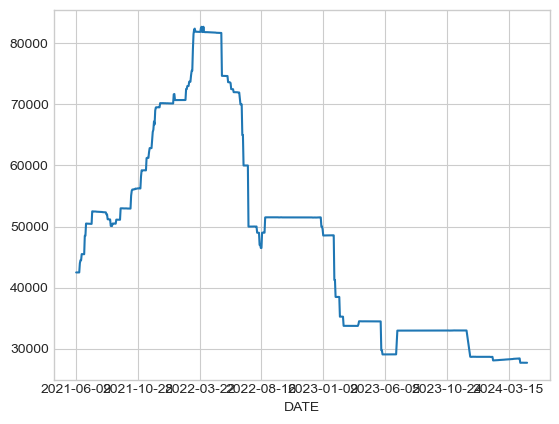

In [15]:
fig = df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'].plot()

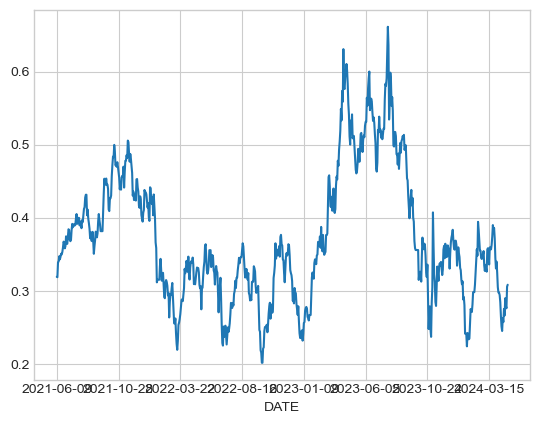

In [16]:
fig = df['ÌèâÍ∑†Ï£ºÍ∞Ä'].plot()

In [17]:
X = df.drop(drop_columns, axis=1) # X, y Î∂ÑÎ¶¨
y = df[['Í∏∞Ï§ÄÍ∞ÄÍ≤©']]

In [18]:
y

Í∏∞Ï§ÄÍ∞ÄÍ≤©
DATE               
2021-06-09  42500.0
2021-06-10  42500.0
2021-06-11  42500.0
2021-06-14  42500.0
2021-06-15  42500.0
...             ...
2024-04-24  27720.0
2024-04-25  27730.0
2024-04-26  27730.0
2024-04-29  27720.0
2024-04-30  27720.0

[731 rows x 1 columns]

In [19]:
X.fillna(0,inplace=True)
X.isna().sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2021-06-09 to 2024-04-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  731 non-null    float64
 1   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò  731 non-null    float64
 2   ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  731 non-null    float64
dtypes: float64(3)
memory usage: 22.8+ KB


In [20]:
X

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú
DATE                                
2021-06-09  2407.51  1682.47   36.33
2021-06-10  2436.46  1682.47   36.33
2021-06-11  2452.92  1682.47   36.33
2021-06-14  2498.37  1741.94   36.33
2021-06-15  2496.55  1741.94   36.33
...             ...      ...     ...
2024-04-24  2886.01  1819.96   71.94
2024-04-25  2895.92  1819.96   71.94
2024-04-26  2917.29  1819.96   71.94
2024-04-29  2909.74  1825.67   71.94
2024-04-30  2916.82  1825.67   71.94

[731 rows x 3 columns]

## 2. 8:2 Î°ú train test Î∂ÑÎ¶¨

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 0 ~ 1
ss = StandardScaler() # ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:724, :] 
X_test = X_ss[724:, :]

y_train = y_ms[:724, :]
y_test = y_ms[724:, :]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (724, 3) (724, 1)
Testing Shape : (7, 3) (7, 1)


In [22]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†ï
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, 
                                  (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))

X_test_tensors_f = torch.reshape(X_test_tensors,
                                (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (724, 3) (724, 1)
Testing Shape : (7, 3) (7, 1)


## 3. GRU Î™®Îç∏ ÏÑ§Ï†ï

In [23]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length, dropout_prob=0.0):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer added
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Applying dropout before the final fully connected layer
        out = self.fc(out)
        return out


In [24]:
num_epochs = 4000
learning_rate = 0.001
dropout_prob = 0.2

input_size=3
hidden_size=75
num_layers=1

num_classes=1

model=GRU(num_classes,input_size,hidden_size,num_layers,X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.16336
Epoch : 100, loss : 0.00297
Epoch : 200, loss : 0.00240
Epoch : 300, loss : 0.00205
Epoch : 400, loss : 0.00171
Epoch : 500, loss : 0.00148
Epoch : 600, loss : 0.00129
Epoch : 700, loss : 0.00114
Epoch : 800, loss : 0.00101
Epoch : 900, loss : 0.00089
Epoch : 1000, loss : 0.00078
Epoch : 1100, loss : 0.00069
Epoch : 1200, loss : 0.00062
Epoch : 1300, loss : 0.00056
Epoch : 1400, loss : 0.00051
Epoch : 1500, loss : 0.00047
Epoch : 1600, loss : 0.00043
Epoch : 1700, loss : 0.00041
Epoch : 1800, loss : 0.00038
Epoch : 1900, loss : 0.00036
Epoch : 2000, loss : 0.00034
Epoch : 2100, loss : 0.00032
Epoch : 2200, loss : 0.00031
Epoch : 2300, loss : 0.00031
Epoch : 2400, loss : 0.00029
Epoch : 2500, loss : 0.00029
Epoch : 2600, loss : 0.00027
Epoch : 2700, loss : 0.00026
Epoch : 2800, loss : 0.00027
Epoch : 2900, loss : 0.00025
Epoch : 3000, loss : 0.00024
Epoch : 3100, loss : 0.00025
Epoch : 3200, loss : 0.00023
Epoch : 3300, loss : 0.00023
Epoch : 3400, loss : 0.000

In [26]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

## 4. ÏòàÏ∏°Îêú Ï£ºÏãù Í∞íÍ≥º Ïã§Ï†ú Ï£ºÏãù Í∞íÏùÑ ÏãúÍ∞ÅÌôî

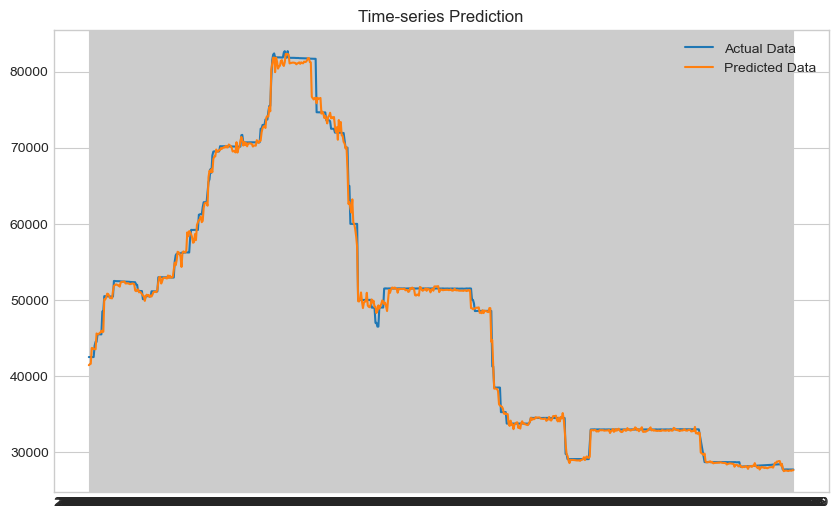

In [27]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
# plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

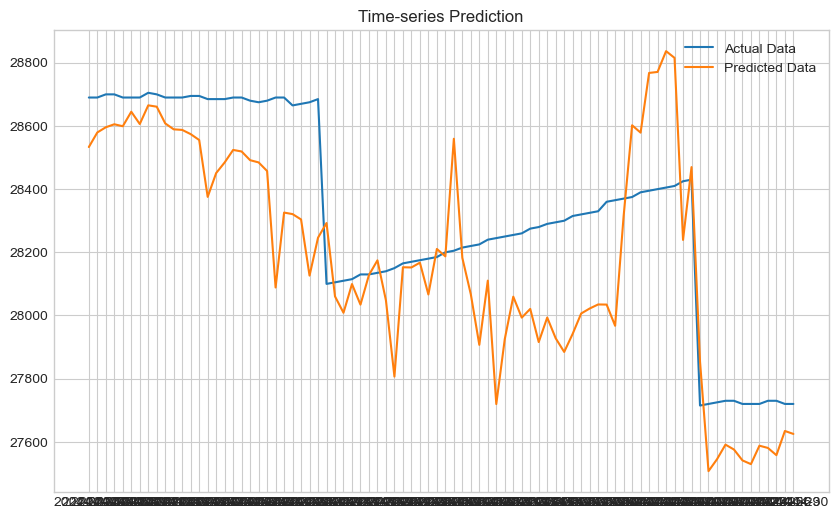

In [28]:
new_df=df.loc['2024-01-01':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

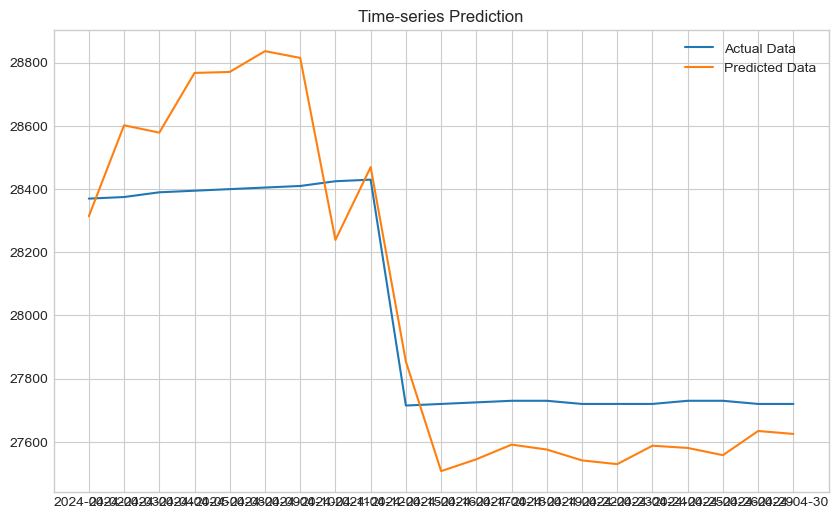

In [29]:
new_df=df.loc['2024-04-01':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

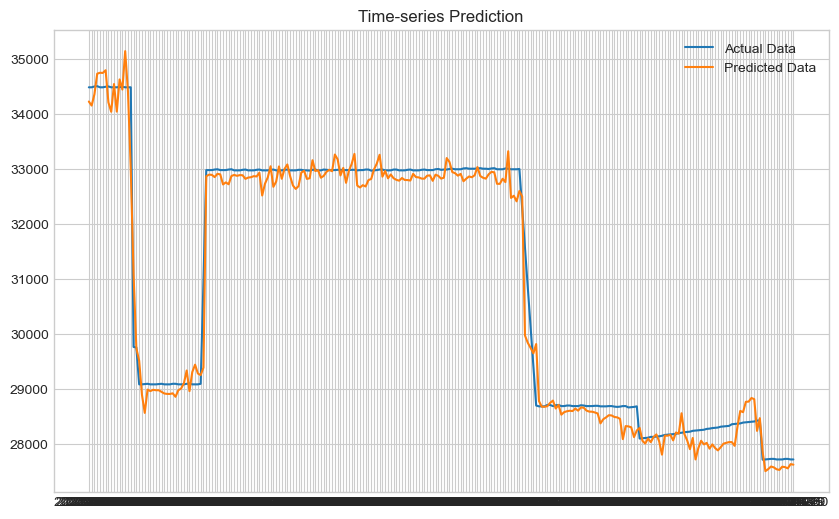

In [30]:
new_df=df.loc['2023-04-30':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

## 5. RMSE Í≥ÑÏÇ∞

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùÑ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
predicted = np.array(df['pred'])
actual = np.array(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'])

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f'RMSE: {rmse}')


RMSE: 812.8369541369048


## 6. Îç∞Ïù¥ÌÑ∞ ÎÇ¥Î≥¥ÎÇ¥Í∏∞

In [32]:
df

Í∏∞Ï§ÄÍ∞ÄÍ≤©   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close  \
DATE                                                                       
2021-06-09  42500.0  2407.51  2494.11  1682.47  2193.115993  1116.890015   
2021-06-10  42500.0  2436.46  2523.49  1682.47  2227.469874  1116.410034   
2021-06-11  42500.0  2452.92  2519.40  1682.47  2284.482995  1111.260010   
2021-06-14  42500.0  2498.37  2567.59  1741.94  2315.536776  1115.550049   
2021-06-15  42500.0  2496.55  2564.67  1741.94  2315.536776  1116.319946   
...             ...      ...      ...      ...          ...          ...   
2024-04-24  27720.0  2886.01  2500.92  1819.96  3043.299367  1370.479980   
2024-04-25  27730.0  2895.92  2521.51  1819.96  3021.949758  1376.969971   
2024-04-26  27730.0  2917.29  2545.06  1819.96  3037.851922  1371.699951   
2024-04-29  27720.0  2909.74  2543.69  1825.67  3008.618815  1377.089966   
2024-04-30  27720.0  2916.82  2538.73  1825.67  3050.612132  1374.640015   

            ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°  ...    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò  \
DATE                                       ...                                 
2021-06-09   36.33    35.27   20.0  673.0  ...  0.000000  0.002092  0.889477   
2021-06-10   36.33    35.27   20.0  673.0  ...  0.004433  0.002511  0.863166   
2021-06-11   36.33    35.27   20.0  673.0  ...  0.007149  0.000152  0.889477   
2021-06-14   36.33    35.27   20.0  673.0  ...  0.007209  0.000455  0.905267   
2021-06-15   36.33    35.27   20.0  673.0  ...  0.008213  0.000268  0.963163   
...            ...      ...    ...    ...  ...       ...       ...       ...   
2024-04-24   71.94    69.18    1.1   63.0  ...  0.482357  0.380355  0.033163   
2024-04-25   71.94    69.18    1.1   63.0  ...  0.454861  0.399120  0.019791   
2024-04-26   71.94    69.18    1.1   63.0  ...  0.459643  0.390736  0.015512   
2024-04-29   71.94    69.18    1.1   63.0  ...  0.466816  0.390736  0.047605   
2024-04-30   71.94    69.18    1.1   63.0  ...  0.465620  0.391534  0.039046   

                ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  \
DATE                                                                   
2021-06-09  0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï   
2021-06-10  0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï   
2021-06-11  0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï   
2021-06-14  0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï   
2021-06-15  0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï   
...              ...       ...         ...       ...       ...   ...   
2024-04-24  0.291067  0.610744    0.150533  0.483246  0.290111  ÏàòÍ∏âÏïàÏ†ï   
2024-04-25  0.267836  0.600151    0.148680  0.484736  0.280054  ÏàòÍ∏âÏïàÏ†ï   
2024-04-26  0.279051  0.595818    0.129226  0.481757  0.276373  ÏàòÍ∏âÏïàÏ†ï   
2024-04-29  0.311494  0.619411    0.135248  0.578555  0.305979  ÏàòÍ∏âÏïàÏ†ï   
2024-04-30  0.306688  0.615559    0.129226  0.584512  0.308565  ÏàòÍ∏âÏïàÏ†ï   

                    pred  
DATE                      
2021-06-09  41431.300781  
2021-06-10  41548.183594  
2021-06-11  41621.804688  
2021-06-14  43688.039062  
2021-06-15  43677.449219  
...                  ...  
2024-04-24  27587.816406  
2024-04-25  27580.720703  
2024-04-26  27557.828125  
2024-04-29  27634.382812  
2024-04-30  27625.085938  

[731 rows x 26 columns]

In [33]:
# df.to_csv('../../results/ÏΩîÎ∞úÌä∏lstm.csv',encoding='cp949')